# Julia ecosystem I

## Topics
- Packages
- Plotting & visualization

## Packages
Julia has about 1700 registered packages, making packages a huge part of the Julia ecosystem.

Even so, the package ecosystem still has some growing to do. Notably, we have first class function calls to other languages, providing excellent foreign function interfaces. We can easily call into python or R, for example, with `PyCall` or `Rcall`.

This means that you don't have to wait until the Julia ecosystem is fully mature, and that moving to Julia doesn't mean you have to give up your favorite package/library from another language!

To see all available packages, check out

https://pkg.julialang.org/ or https://juliaobserver.com/

## Installing packages
For now, let's learn how to use a package.

Before anything, we have to activate the package manager by running `using Pkg`.

The first time you use a package on a given Julia installation, you need to explicitly add it

In [ ]:
using Pkg
Pkg.add("Example")

## Using packages
Every time you use Julia (start a new session at the REPL, or open a notebook for the first time, for example), you load the package with the `using` keyword

In [ ]:
using Example

In the source code of `Example.jl` at https://github.com/JuliaLang/Example.jl/blob/master/src/Example.jl we see the following function declared

```julia
hello(who::String) = "Hello, $who"
```
Having loaded `Example`, we should now be able to call `hello`

In [ ]:
hello("Julia!")

## Demonstration with `Colors`
Let's play with the `Colors` package to see this in action. 

NOTE: Notebooks are nicely integrated to show us the colors in realtime!

In [ ]:
Pkg.add("Colors")

In [ ]:
using Colors

In [6]:
hue = 180 #[0,360] hue of the color, try changing me!
N   = 10  #number of colors to create, try changing me too!
palette = sequential_palette(hue, N)

In [ ]:
palette = distinguishable_colors(100) #Maximally distinguishable colors; try me out too!

In [ ]:
hueLeft  = 12
hueRight = 225
palette = diverging_palette(hueLeft, hueRight, 20) #Woah, hold on! What am I?

In [67]:
rand(palette, 8, 8) #create 8x8 random number matrix of different values in `palette`.

## Interoperability
There are many existing codes and libraries, why should we re-use them? One of the strenghts of Julia is it's interoperability. 

C and Fortran, for example are natively supported. But many other languages are just one package away. 

Take python for example:

In [12]:
using PyCall

@pyimport scipy.optimize as so
so.newton(x -> cos(x) - x, 1)

0.7390851332151607

## Different libraries for different languages
- Python with [PyCall](https://github.com/JuliaPy/PyCall.jl)
- R with [RCall](https://github.com/JuliaInterop/RCall.jl)
- C++ with [CxxWrap](https://github.com/JuliaInterop/CxxWrap.jl)
- Matlab with [MATLAB](https://github.com/JuliaInterop/MATLAB.jl)
- Java with [JavaCall](https://github.com/JuliaInterop/JavaCall.jl)
- Mathematica with [Mathematica](https://github.com/JuliaInterop/Mathematica.jl)
- ObjectiveC with [ObjectiveC](https://github.com/JuliaInterop/ObjectiveC.jl)

## Plotting

There are few different ways to plot in Julia. 

Here we'll use the `Plots` [package](http://docs.juliaplots.org/latest/) that tries to unify many of the underlying visualization engines to have a similar interface.

In [ ]:
Pkg.add("Plots")
using Plots

One of the advantages to `Plots.jl` is that it allows you to seamlessly change backends. For example, if you are familiar with the matplotlib library from Python, then you can keep using that via the `PyPlot` [package](https://github.com/JuliaPy/PyPlot.jl).

Engines/backends include:
- [Plotly](https://plot.ly/julia/): Plotly.jl package (`plotly()` to activate)
    - default for Plots if nothing else is installed
    - interactive plots in browser
    - `PlotlyJS` (activate with `plotlyjs()`) is the local offline version
- [PyPlot](https://github.com/JuliaPy/PyPlot.jl): Matplotlib interface (`pyplot()` to activate)
    - All the bells and whistles of Matplotlib
- [GR](https://github.com/jheinen/GR.jl): GR framework interface (`gr()` to activate)
- [UnicodePlots](https://github.com/Evizero/UnicodePlots.jl): (`unicodeplots()` to activate)
    - Plots inside terminal!
    
Also:
- [Gadfly](http://gadflyjl.org/stable/): Wickham-Wilkinson style grammar
For R-styled plotting.

See the [docs](http://docs.juliaplots.org/v1/backends/) for more info about different backends, and their pros & cons.

In [ ]:
#Pkg.add("PlotlyJS") #let's install our own local plotly
Pkg.add("PyPlot") #let's install our own local plotly

In [ ]:
#plotly()       # Plotly.jl (needs Plotly package)
#plotlyjs()     # local javascript server for plotly (needs PlotlyJS)
#gr()           # GR backend, (needs GR package)
pyplot()       # Matplotlib interface (needs PyPlot package and up-to-date system matplotlib)
#unicodeplots() # UnicodePlots backend (needs UnicodePlots package); NOTE: does not work in notebooks

## Pirates!
In the name of scientific inquiry, let's use this notebook to examine the relationship between the global temperature and the number of pirates between roughly 1860 and 2000.

In [ ]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17]

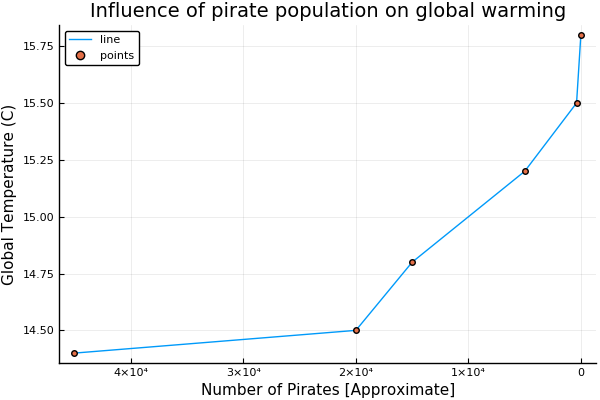

In [36]:
pyplot() #load interface
plot(numpirates, globaltemperatures, label="line")
scatter!(numpirates, globaltemperatures, label="points")

xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")
xflip!()

## Random Walk
Let's take our visualization to the next dimension. Here is a simple plot to visualize the random walk in 3D.

In [ ]:
#activate Plotly backend (if you have not done it previously)
using Plots
pyplot()

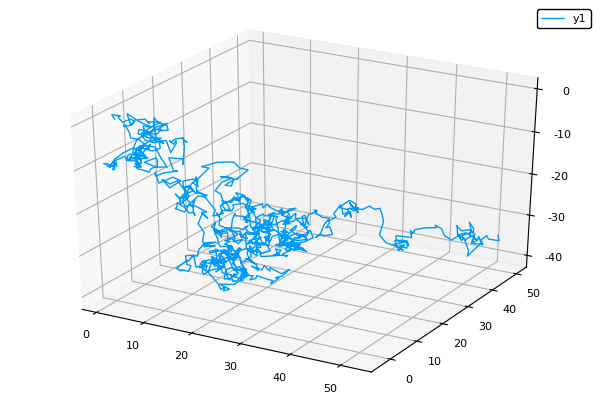

In [37]:
n = 1000
rw() = cumsum(randn(n)) #function for cumulative random values

# x/y/z coordinates
x = rw() 
y = rw()
z = rw()

plot(x,y,z)

## Animations
Finally, let's add some time aspect to our visualizations. `Plots` has a simple `@gif` macro for this.

It builds an animation using one frame per iteration loop, then creates an animated GIF from that.
```julia
p = plot(1)
@gif for x=0:0.1:5
    push!(p, 1, sin(x))
end
```

Let's write up a simple Lorenz attractor. See https://en.wikipedia.org/wiki/Lorenz_system

In [ ]:
n = 2000
dt = 0.02
σ, ρ, β = 10., 28., 8/3
global x, y, z = 1., 1., 1.

# Lorentz attractor
function lorentzAttractor(x,y,z)
    x += dt * σ*(y - x)
    y += dt * (x*(ρ - z) - y)   
    z += dt * (x*y - β*z  )
    return x, y, z
end

In [ ]:
#activate PyPlot backend (if you have not done it previously)
using Plots
pyplot()

In [ ]:
# initialize a 3D plot with 1 empty series
plt = path3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                xlab = "x", ylab = "y", zlab = "z",
                title = "Lorenz Attractor", marker = 1)

# build an animated gif, saving every 10th frame
@gif for i=1:n
    global x, y, z = lorentzAttractor(x,y,z)
    push!(plt, x, y, z)
end every 100

![animation](../slides/tmp.gif)

## More examples
For more examples, see [Plots](http://docs.juliaplots.org/latest) documentation.
- [PyPlot](http://docs.juliaplots.org/latest/examples/pyplot/)
- [GR](http://docs.juliaplots.org/latest/examples/gr/)
- [Plotly](http://docs.juliaplots.org/latest/examples/plotlyjs/)
- etc.

## Summary

Julia provides a powerful interoparability API for usage of various other languages.

These rely on external libraries such as:
- Python with [PyCall](https://github.com/JuliaPy/PyCall.jl)
- R with [RCall](https://github.com/JuliaInterop/RCall.jl)

Same functionality also allows to use many mature visualization libraries via Julia.